In [32]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Градиентный спуск

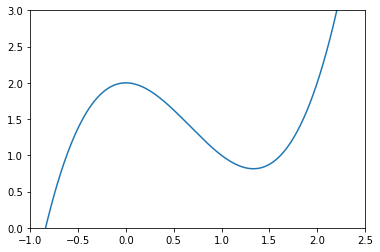

In [33]:
f = lambda x: x**3-2*x**2+2
x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

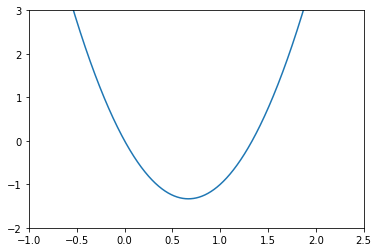

In [34]:
f_prime = lambda x: 3*x**2-4*x
x = np.linspace(-1,2.5,1000)
plt.plot(x,f_prime(x))
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Метод градиентного спуска

In [35]:
lr = 0.1
points = [2]
n_epochs = 15

In [36]:
for _ in range(n_epochs):
    cur_point = points[-1]
    grad = f_prime(cur_point)
    new_point = cur_point - lr * grad
    points.append(new_point)

In [37]:
y_points = [f(p) for p in points]


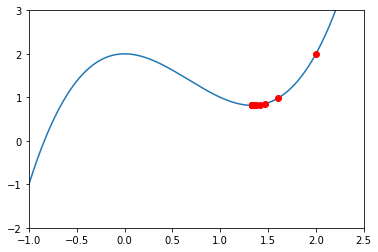

In [38]:
plt.plot(x,f(x))
plt.plot(points, y_points, 'ro')
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Практический пример

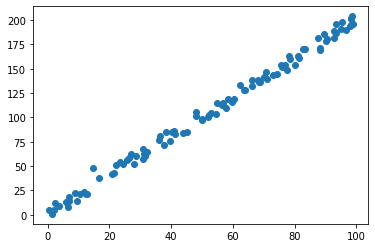

In [39]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

<img src="gradientdescentofmsetable.png"/>

## Применим метод градиентного спуска

In [40]:
EPOCHS = 20
LEARNING_RATE = 0.0001

In [41]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2
    return total_cost / (2 * len(X))

In [42]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X))    

In [43]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X))  

In [44]:
theta0 = 1
theta1 = 1
for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 1.005304138442059 t1: 1.3698212115537935 cost: 741.352074730806
t0: 1.0086504111456496 t1: 1.6025782900162575 cost: 299.8962006203967
t0: 1.0107644467850687 t1: 1.7490702712362292 cost: 125.02838210337617
t0: 1.0121029398050336 t1: 1.8412689312621213 cost: 55.76040654758608
t0: 1.012953323466143 t1: 1.8992965902641752 cost: 28.32223768976387
t0: 1.0134965018285509 t1: 1.9358177861279482 cost: 17.45353218843974
t0: 1.0138463318582625 t1: 1.9588032955083081 cost: 13.148259263032765
t0: 1.0140744725810462 t1: 1.9732697468093778 cost: 11.442868195783944
t0: 1.0142260245836687 t1: 1.9823744936536156 cost: 10.767332406049666
t0: 1.014329373165888 t1: 1.988104703734977 cost: 10.499738957814579
t0: 1.0144023833999838 t1: 1.9917110559181324 cost: 10.393738072831793
t0: 1.0144562991625516 t1: 1.9939806994845897 cost: 10.35174661730914
t0: 1.0144981970978362 t1: 1.9954090485721279 cost: 10.335110332783408
t0: 1.0145325310873219 t1: 1.9963079057494297 cost: 10.328517641943249
t0: 1.01456210430

In [45]:
cost_function(X,Y,10,10)

122493.52704870714

In [46]:
# h(xi) = params[0] + params[1] * xi

EPOCHS = 12
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions)    

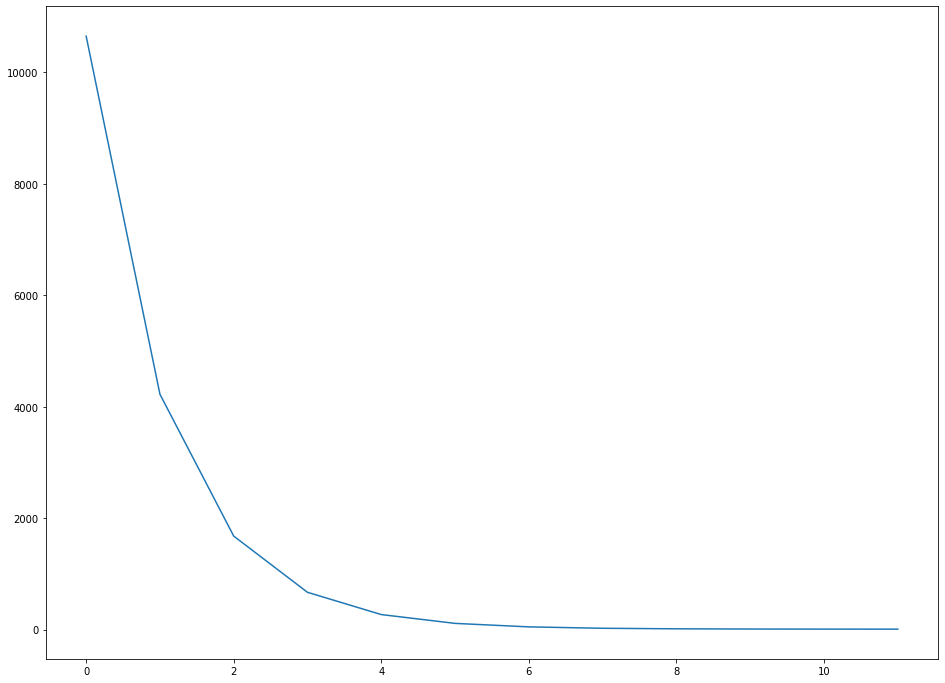

In [47]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

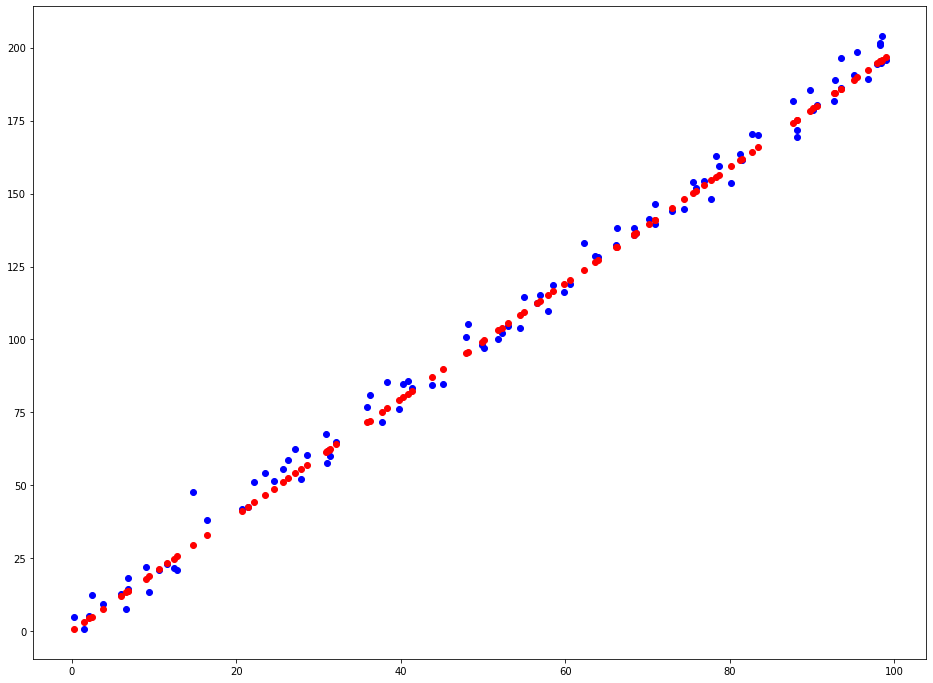

In [48]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

In [49]:
params

array([0.19594656, 2.00027016])

## Метод стохастического градиентного спуска

In [50]:
EPOCHS = 120
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

print('params: ', params)

for _ in range(EPOCHS):
    # Для статистики считаем общее предсказание и функцию потерь
    predictions = params[0] + params[1] * X
    preds.append(predictions)
    
    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    i = np.random.choice(len(X))
    current_prediction = params[0] + params[1] * X[i]

    params[0] -= LEARNING_RATE * (current_prediction - Y[i])
    params[1] -= LEARNING_RATE * ((current_prediction - Y[i]) * X[i])

params:  [-3.00642113 -0.39345007]


In [51]:
print('costs: ', costs)
print('params: ', params)
print('preds: ', preds)

costs:  [11122.553104659153, 2642.0372000296793, 748.1954666669725, 33.8129800890128, 16.247717944386462, 14.040167232489445, 14.214772537062336, 18.87450259516859, 16.70868499264968, 20.492744291351464, 20.9550691613472, 20.492285724686763, 15.001846587877258, 13.653345176590053, 15.454265025718444, 17.46507066093531, 17.872102141104268, 18.243393632028713, 17.532600111882605, 17.367014930458627, 14.448478890049964, 13.920156864742546, 14.311502672091772, 13.641022217838746, 13.519118998748988, 13.667091473292812, 13.807563574643241, 13.491682554016847, 13.358066251916144, 13.392038906686047, 13.301070057637448, 13.71821229921863, 13.523167519468156, 13.142310221219413, 13.123800355807262, 13.192191847701865, 13.3458990375297, 13.797972240554365, 13.790833982244475, 13.64166192970203, 13.23455085451969, 13.173039448364516, 14.45533233664763, 15.679289854263425, 15.265959279899231, 13.624500442007104, 13.246720978539118, 13.799628975740573, 16.632610960243927, 14.252797697461332, 13.88

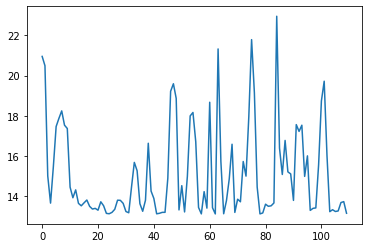

In [52]:
plt.plot(costs[10:])
plt.show()

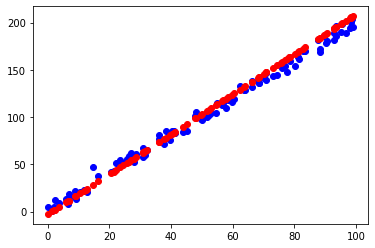

In [53]:
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

## Broyden-Fletcher-Goldfarb-Shanno algorithm (BFGS)

In [54]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [55]:
def square(X):
    return X[0]**2 + X[1]**2

phi_m = np.linspace(-2, 2, 100)
phi_p = np.linspace(-2, 2, 100)
X,Y = np.meshgrid(phi_p, phi_m)
XY = np.hstack((X.reshape(-1, 1), Y.reshape(-1,1)))
Z = np.array([square(t) for t in XY]).reshape(X.shape)

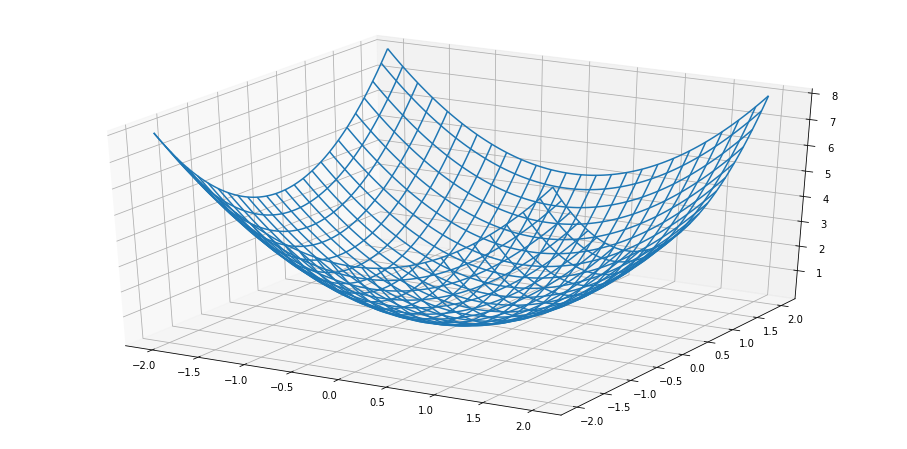

In [56]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
# Add a color bar which maps values to colors.

plt.show()

In [57]:
from scipy.optimize import minimize

In [58]:
res = minimize(square, np.array((1,1)), method='BFGS')

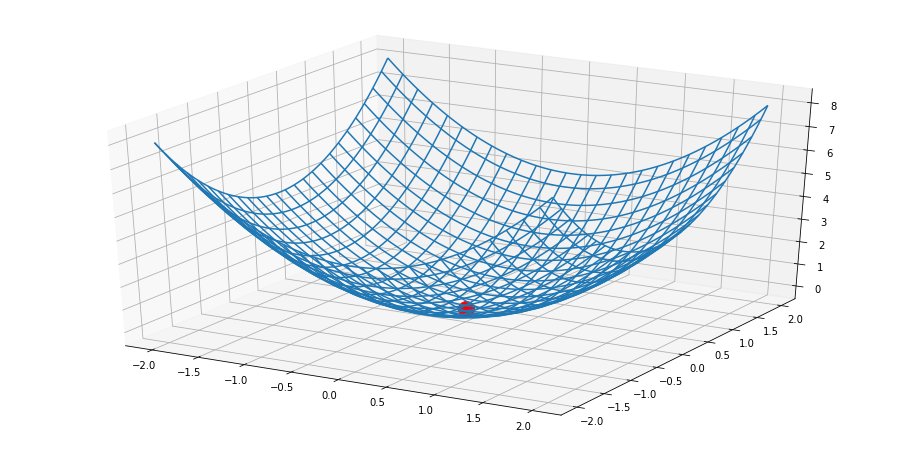

In [59]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
ax.scatter(res.x[0].reshape(-1, 1), res.x[1].reshape(-1, 1), np.array([square(res.x)]).reshape(-1,1),
          c='red', s=256)

plt.show()